In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact, Dropdown
import seaborn as sns
from sklearn.impute import KNNImputer
# from mod.unique_value import checking_unique_value

In [ ]:
def checking_unique_value(df):
    unique_values = [df[col].nunique() for col in df]
    for col, values in zip(df.columns, unique_values):
        print(f"Unique values in column '{col}': {values}")

# Annual Surface Temperature Change

## Import Data

In [29]:
annual_surface_temperature_change_df = pd.read_csv('./Annual_Surface_Temperature_Change.csv')
annual_surface_temperature_change_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


## Check Data

In [30]:
annual_surface_temperature_change_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [31]:
annual_surface_temperature_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [32]:
annual_surface_temperature_change_df.describe().round(2)

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.0,188.00,189.00,188.00,188.00,188.00,192.00,191.00,191.00,190.00,...,216.00,216.00,216.00,213.00,214.00,213.00,213.00,212.00,213.00,213.00
mean,113.0,0.16,-0.01,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.93,1.11,1.27,1.44,1.28,1.30,1.44,1.55,1.34,1.38
std,65.1,0.41,0.34,0.39,0.31,0.27,0.38,0.34,0.27,0.31,...,0.32,0.56,0.46,0.40,0.39,0.60,0.47,0.62,0.48,0.67
min,1.0,-0.69,-0.91,-1.27,-0.88,-1.06,-1.80,-1.05,-1.63,-0.90,...,0.12,-0.09,-0.43,0.25,0.02,0.24,0.05,0.23,-0.42,-1.30
25%,57.0,-0.10,-0.16,-0.21,-0.24,-0.39,-0.04,-0.26,-0.34,-0.01,...,0.74,0.74,1.02,1.15,1.03,0.86,1.17,1.16,1.02,0.88
50%,113.0,0.06,-0.06,-0.00,-0.06,-0.23,0.10,-0.15,-0.19,0.20,...,0.90,0.99,1.22,1.45,1.28,1.12,1.41,1.48,1.33,1.32
75%,169.0,0.32,0.11,0.23,0.13,-0.09,0.28,0.02,-0.07,0.35,...,1.19,1.34,1.52,1.71,1.54,1.83,1.70,1.83,1.63,1.92
max,225.0,1.89,1.00,1.20,1.10,0.86,1.15,1.13,0.48,0.94,...,1.64,2.70,2.61,2.46,2.49,2.77,2.69,3.69,2.68,3.24


At a glance, we can see that we have several empty cells (null or blank).


## Identify Unique Values

In [33]:
checking_unique_value(annual_surface_temperature_change_df)

Unique values in column 'ObjectId': 225
Unique values in column 'Country': 225
Unique values in column 'ISO2': 223
Unique values in column 'ISO3': 225
Unique values in column 'Indicator': 1
Unique values in column 'Unit': 1
Unique values in column 'Source': 1
Unique values in column 'CTS_Code': 1
Unique values in column 'CTS_Name': 1
Unique values in column 'CTS_Full_Descriptor': 1
Unique values in column 'F1961': 173
Unique values in column 'F1962': 169
Unique values in column 'F1963': 167
Unique values in column 'F1964': 167
Unique values in column 'F1965': 167
Unique values in column 'F1966': 171
Unique values in column 'F1967': 160
Unique values in column 'F1968': 168
Unique values in column 'F1969': 169
Unique values in column 'F1970': 168
Unique values in column 'F1971': 163
Unique values in column 'F1972': 167
Unique values in column 'F1973': 176
Unique values in column 'F1974': 168
Unique values in column 'F1975': 165
Unique values in column 'F1976': 171
Unique values in column

In [34]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = annual_surface_temperature_change_df.drop(columns=columns_to_drop, axis='columns')

# We can display the dataframe of the years columns.
df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [35]:
numerical_df = annual_surface_temperature_change_df.select_dtypes(include = ['int64','float64']).columns.values
numerical_df

array(['ObjectId', 'F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966',
       'F1967', 'F1968', 'F1969', 'F1970', 'F1971', 'F1972', 'F1973',
       'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980',
       'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987',
       'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008',
       'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015',
       'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022'],
      dtype=object)

## Identify Missing Values

In [36]:
# Correspond to the number of blank or null values from each columns
null_counts = annual_surface_temperature_change_df.isnull().sum()

# We can retrieve the sum of null value from all the df
#null_counts.sum()
#sorted(null_counts)

## Missing Values Percent

In [37]:
percent_missing = annual_surface_temperature_change_df.isnull().sum() * 100 / len(annual_surface_temperature_change_df)
sorted(percent_missing.round(2))
#percent_missing = percent_missing.sort_values(ascending=False,inplace=True)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.89,
 3.56,
 3.56,
 4.0,
 4.0,
 4.0,
 4.44,
 4.44,
 4.44,
 4.89,
 4.89,
 5.33,
 5.33,
 5.33,
 5.33,
 5.33,
 5.33,
 5.78,
 5.78,
 5.78,
 5.78,
 5.78,
 6.67,
 6.67,
 6.67,
 7.11,
 7.11,
 7.11,
 7.56,
 7.56,
 7.56,
 8.0,
 14.22,
 14.67,
 14.67,
 14.67,
 14.67,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.56,
 15.56,
 15.56,
 15.56,
 15.56,
 15.56,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.44,
 16.44,
 16.44,
 16.44,
 16.44,
 16.44,
 16.44,
 16.44,
 17.78]

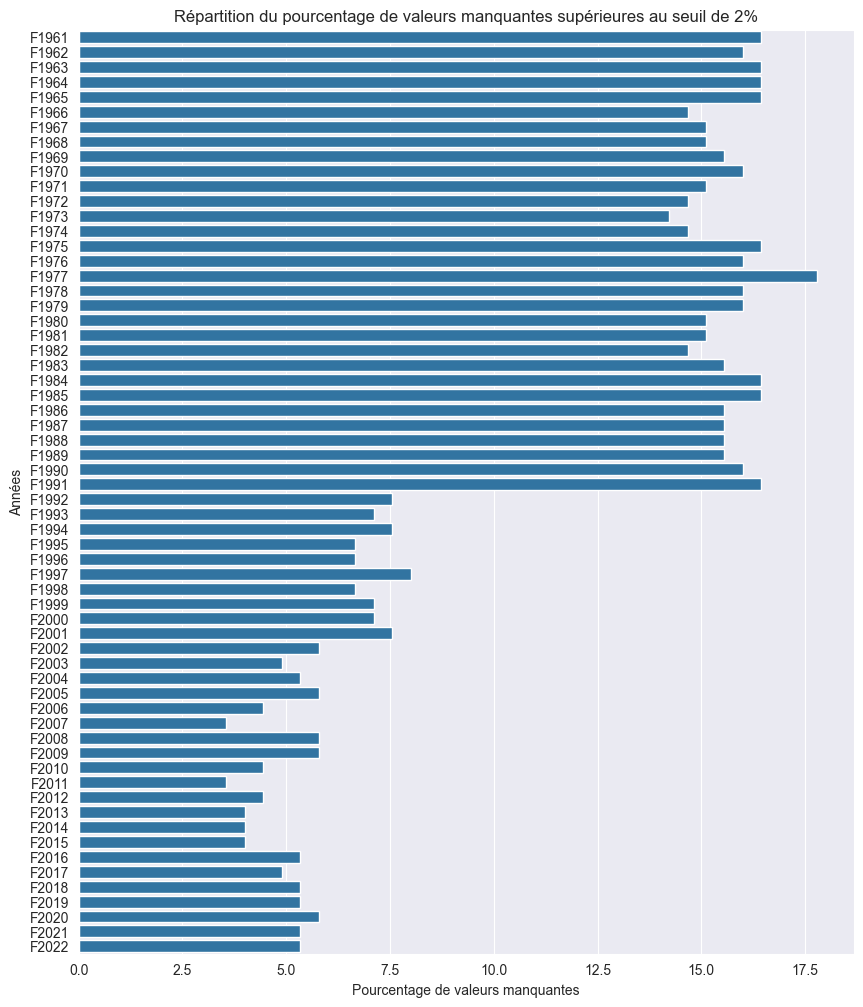

In [38]:
threshold_view = 2

filtered = percent_missing[percent_missing.values > threshold_view]
plt.figure(figsize=(10, 12)) 
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
             f"supérieures au seuil de {threshold_view}%");
ax.set_xlabel("Pourcentage de valeurs manquantes")
ax.set_ylabel("Années")

plt.show()

In [39]:
knn = KNNImputer(n_neighbors=5)
imputed_values = knn.fit_transform(df)

imputed_df = pd.DataFrame(imputed_values, columns=df.columns, index=df.index)
imputed_df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.2810,0.4560,1.0930,1.5550,1.540,1.5440,0.9100,0.498,1.3270,2.0120
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.3330,1.1980,1.5690,1.4640,1.121,2.0280,1.6750,1.498,1.5360,1.5180
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.1920,1.6900,1.1210,1.7570,1.512,1.2100,1.1150,1.926,2.3300,1.6880
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.2570,1.1700,1.0090,1.5390,1.435,1.1890,1.5390,1.430,1.2680,1.2560
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.8310,1.9460,1.6900,1.9900,1.925,1.9190,1.9640,2.562,1.5330,3.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.4230,1.4010,1.5100,1.7320,2.204,0.9420,1.4770,2.069,1.5930,1.9700
221,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.0160,1.0530,1.4120,1.6600,1.429,1.2900,1.4440,1.711,1.4470,1.3940
222,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,0.9302,1.3258,1.3368,1.3578,1.058,1.7076,1.4812,1.545,1.1102,1.3258
223,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,...,0.7900,0.9170,1.4500,1.4010,0.105,0.6480,0.8550,0.891,0.8220,0.6860


In [40]:
df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [41]:
imputed_df.isna().sum().sum()

0

In [42]:
country = annual_surface_temperature_change_df['Country']

In [43]:
imputed_df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.2810,0.4560,1.0930,1.5550,1.540,1.5440,0.9100,0.498,1.3270,2.0120
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.3330,1.1980,1.5690,1.4640,1.121,2.0280,1.6750,1.498,1.5360,1.5180
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.1920,1.6900,1.1210,1.7570,1.512,1.2100,1.1150,1.926,2.3300,1.6880
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.2570,1.1700,1.0090,1.5390,1.435,1.1890,1.5390,1.430,1.2680,1.2560
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.8310,1.9460,1.6900,1.9900,1.925,1.9190,1.9640,2.562,1.5330,3.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.4230,1.4010,1.5100,1.7320,2.204,0.9420,1.4770,2.069,1.5930,1.9700
221,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.0160,1.0530,1.4120,1.6600,1.429,1.2900,1.4440,1.711,1.4470,1.3940
222,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,0.9302,1.3258,1.3368,1.3578,1.058,1.7076,1.4812,1.545,1.1102,1.3258
223,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,...,0.7900,0.9170,1.4500,1.4010,0.105,0.6480,0.8550,0.891,0.8220,0.6860


In [44]:
country_year_df = pd.concat([country, imputed_df], axis=1)
#country_year_df = country_year_df.set_index('Country')[year_features]
country_year_df.columns = country_year_df.columns.where(~country_year_df.columns.str.startswith('F'), country_year_df.columns.str[1:])
country_year_df

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.2810,0.4560,1.0930,1.5550,1.540,1.5440,0.9100,0.498,1.3270,2.0120
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.3330,1.1980,1.5690,1.4640,1.121,2.0280,1.6750,1.498,1.5360,1.5180
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.1920,1.6900,1.1210,1.7570,1.512,1.2100,1.1150,1.926,2.3300,1.6880
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.2570,1.1700,1.0090,1.5390,1.435,1.1890,1.5390,1.430,1.2680,1.2560
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.8310,1.9460,1.6900,1.9900,1.925,1.9190,1.9640,2.562,1.5330,3.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,...,1.4230,1.4010,1.5100,1.7320,2.204,0.9420,1.4770,2.069,1.5930,1.9700
221,World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,...,1.0160,1.0530,1.4120,1.6600,1.429,1.2900,1.4440,1.711,1.4470,1.3940
222,"Yemen, Rep. of",0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,...,0.9302,1.3258,1.3368,1.3578,1.058,1.7076,1.4812,1.545,1.1102,1.3258
223,Zambia,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,...,0.7900,0.9170,1.4500,1.4010,0.105,0.6480,0.8550,0.891,0.8220,0.6860


In [45]:
df_melted = country_year_df.melt(id_vars='Country', var_name='Year', value_name='Value')

# Create an interactive line plot using Plotly Express
fig = px.line(df_melted, x='Year', y='Value', color='Country',
              title='Surface Temperature Change Over Years by Country',
              labels={'Value': 'Value', 'Year': 'Year', 'Country': 'Country'})

# Update layout
fig.update_layout(xaxis_title='Year', yaxis_title='Surface Temperature Change')

# Scale down properties
fig.update_layout(font=dict(size=12),  # Adjust font size
                  legend=dict(font=dict(size=10)),  # Adjust legend font size
                  margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
                  hoverlabel=dict(font_size=10),  # Adjust hover label font size
                  hovermode='x',  # Display hover information only along x-axis
                  showlegend=True,  # Show legend
                  plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
                  xaxis=dict(tickfont=dict(size=10)),  # Adjust x-axis tick font size
                  yaxis=dict(tickfont=dict(size=10)),  # Adjust y-axis tick font size
                  )

# Show plot
fig.show()

In [46]:
country_year_df.set_index('Country', inplace=True)
country_year_df 

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.2810,0.4560,1.0930,1.5550,1.540,1.5440,0.9100,0.498,1.3270,2.0120
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.3330,1.1980,1.5690,1.4640,1.121,2.0280,1.6750,1.498,1.5360,1.5180
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.1920,1.6900,1.1210,1.7570,1.512,1.2100,1.1150,1.926,2.3300,1.6880
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.2570,1.1700,1.0090,1.5390,1.435,1.1890,1.5390,1.430,1.2680,1.2560
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.8310,1.9460,1.6900,1.9900,1.925,1.9190,1.9640,2.562,1.5330,3.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.4230,1.4010,1.5100,1.7320,2.204,0.9420,1.4770,2.069,1.5930,1.9700
World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.0160,1.0530,1.4120,1.6600,1.429,1.2900,1.4440,1.711,1.4470,1.3940
"Yemen, Rep. of",0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,0.9302,1.3258,1.3368,1.3578,1.058,1.7076,1.4812,1.545,1.1102,1.3258


## Create a plot to see the evolution of the Annual Surface Temperature Change (ASTC) over the globe.

In [47]:
# Plot function to plot temperature change for the selected country
def plot_temperature_change(country):
    plt.clf()  # Clear previous plot
    plt.plot(country_year_df_transposed[country])
    plt.title(f'Temperature Change in {country}')
    plt.xlabel('Years')
    plt.ylabel('Temperature Change (°C)')
    plt.xticks(country_year_df_transposed.index[::3], rotation=90)
    plt.show()

In [48]:
country_year_df_transposed = country_year_df.T

In [49]:
# Dropdown menu
countries = list(country_year_df_transposed.columns)
country_dropdown = Dropdown(options=countries, description='Country:')

In [50]:
countries

['Afghanistan, Islamic Rep. of',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra, Principality of',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia, Rep. of',
 'Aruba, Kingdom of the Netherlands',
 'Australia',
 'Austria',
 'Azerbaijan, Rep. of',
 'Bahamas, The',
 'Bahrain, Kingdom of',
 'Bangladesh',
 'Barbados',
 'Belarus, Rep. of',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China, P.R.: Hong Kong',
 'China, P.R.: Macao',
 'China, P.R.: Mainland',
 'Colombia',
 'Comoros, Union of the',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Cook Islands',
 'Costa Rica',
 'Croatia, Rep. of',
 'Cuba',
 'Cyprus',
 'Czech Rep.',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Rep.',
 'Ecuador',
 '

In [51]:
# Use interact to link the dropdown with the plotting function
interact(plot_temperature_change, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('Afghanistan, Islamic Rep. of', 'Albania', 'Al…

<function __main__.plot_temperature_change(country)>

In [52]:
# Calculate mean temperature change for each country
mean_temperatures = country_year_df_transposed.mean(axis=1)
mean_temperatures

1961    0.208908
1962   -0.028426
1963   -0.036063
1964   -0.096618
1965   -0.276077
          ...   
2018    1.290268
2019    1.433282
2020    1.543214
2021    1.332435
2022    1.367350
Length: 62, dtype: float64

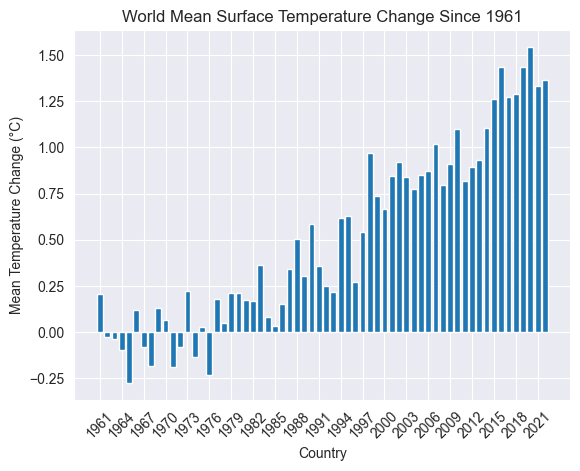

In [53]:
# Plot bar chart
plt.bar(mean_temperatures.index, mean_temperatures)
plt.title('World Mean Surface Temperature Change Since 1961')
plt.xlabel('Country')
plt.ylabel('Mean Temperature Change (°C)')
plt.xticks(country_year_df_transposed.index[::3], rotation=45)
plt.show()